## Introduction to the dataset

- World Health Organization has  estimated 12 million deaths occur worldwide, every year due to Heart diseases.

- Half the deaths in the United States and other developed countries are due to cardio vascular diseases. 

- The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications.

- This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression.


In [169]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline
from sklearn import metrics
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

## Data Preparation



The dataset is publically available and it is from an ongoing ongoing cardiovascular study on residents of the town of Framingham, Massachusetts.  The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 16 attributes.

In [137]:
df=pd.read_csv("US_Heart_Patients.csv")
df.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [139]:
df.shape

(4240, 16)

In [140]:
df.isnull().sum()

gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [141]:
df1 = df.dropna(axis=0)

In [142]:
df1.shape

(3658, 16)

In [143]:
df1.isnull().sum()

gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [144]:
col= df1.columns
col

Index(['gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [145]:
df1.TenYearCHD.value_counts()*100/len(df1)

0    84.7731
1    15.2269
Name: TenYearCHD, dtype: float64

In [146]:
df1.describe()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000
mean,0.443685,49.551941,1.980317,0.489065,9.025424,0.030344,0.005741,0.311646,0.027064,236.847731,132.370558,82.917031,25.782802,75.730727,81.852925,0.152269
std,0.496886,8.562029,1.022656,0.499949,11.921590,0.171557,0.075561,0.463229,0.162292,44.097681,22.086866,11.974258,4.065601,11.981525,23.904164,0.359331
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,143.875000,90.000000,28.037500,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [156]:
x= df1.drop('TenYearCHD',axis=1)
y = df1.TenYearCHD

In [158]:
x.shape

(3658, 15)

In [159]:
y.shape

(3658,)

In [160]:
# Split the data into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=234 )

In [162]:
x_train.shape

(3292, 15)

In [165]:
y_train.shape

(3292,)

In [167]:
x_test.shape

(366, 15)

In [177]:
y_test.shape

(366,)

In [178]:
y_test_df = pd.DataFrame(y_test)
y_test_df.value_counts()

TenYearCHD
0             322
1              44
dtype: int64

In [243]:
## Using sklearn
from sklearn.tree import DecisionTreeClassifier
dtmodel = DecisionTreeClassifier(max_depth=4)
model1 = dtmodel.fit(x_train,y_train)

In [244]:
y_pred = model1.predict(x_test)

In [245]:
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.value_counts()

0    356
1     10
dtype: int64

In [246]:
## import confusion matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test,y_pred)
cm1

array([[313,   9],
       [ 43,   1]], dtype=int64)

In [247]:
tn = cm1[0,0]
tp = cm1[1,1]
fp = cm1[0,1]
fn = cm1[1,0]

In [248]:
print( tp, tn, fp, fn)

1 313 9 43


In [249]:
accuracy = (tp+tn)/(tp+tn+fp+fn)
accuracy

0.8579234972677595

In [250]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8579234972677595

In [266]:
recal = tp/(tp+fn)
recal

0.022727272727272728

In [267]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred)

0.022727272727272728

In [268]:
precis = tp/(tp+fp)
precis

0.1

In [269]:
from sklearn.metrics import precision_score

In [270]:
precision_score(y_test,y_pred)

0.1

In [82]:
#!pip install graphviz

In [256]:
import graphviz
from sklearn.tree import export_graphviz

In [257]:
dot= export_graphviz(model1,feature_names=x_train.columns,class_names=['0','1'],filled=True,rounded=True, proportion=True)

In [258]:
graph = graphviz.Source(dot)

In [259]:
graph.render("Decision Tree", view=True)

'Decision Tree.pdf'

In [260]:
y_test.value_counts()

0    322
1     44
Name: TenYearCHD, dtype: int64

### ROC curve

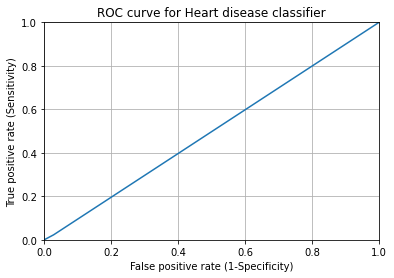

In [264]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [265]:
auc = roc_auc_score(y_test,y_pred)
auc

0.49738848108413325

## Imbalance data treatment

In [271]:
# The classes are heavily skewed we need to solve this issue later.
print('No_Disease', round(df1['TenYearCHD'].value_counts()[0]/len(df1) * 100,2), '% of the dataset')
print('Disease', round(df1['TenYearCHD'].value_counts()[1]/len(df1) * 100,2), '% of the dataset')

No_Disease 84.77 % of the dataset
Disease 15.23 % of the dataset


- Most of the patient has no disease. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most of the patients has no diease. 
- But we don't want our model to assume, we want our model to detect patterns that give signs of disease

C:\Users\mallikarjunad\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Class Distributions \n (0: No Disease || 1: Disease)')

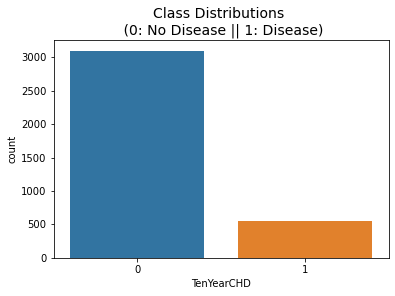

In [35]:
sn.countplot('TenYearCHD', data=df1)
plt.title('Class Distributions \n (0: No Disease || 1: Disease)', fontsize=14)

### SMOTE Technique (Over-Sampling):

- SMOTE stands for Synthetic Minority Over-sampling Technique.
- Unlike Random UnderSampling, SMOTE creates new synthetic points in order to have an equal balance of the classes.
- This is another alternative for solving the "class imbalance problems". 

**Understanding SMOTE:**

- **Solving the Class Imbalance :** SMOTE creates synthetic points from the minority class in order to reach an equal balance between the minority and majority class.

- **Location of the synthetic points :** SMOTE picks the distance between the closest neighbors of the minority class, in between these distances it creates synthetic points.

- **Final Effect :** More information is retained since we didn't have to delete any rows unlike in random undersampling.

- **Accuracy || Time Tradeoff :** Although it is likely that SMOTE will be more accurate than random under-sampling, it will take more time to train since no rows are eliminated as previously stated.

In [272]:
x_train.shape

(3292, 15)

In [274]:
y_train.value_counts()*100/len(y_train)

0    84.416768
1    15.583232
Name: TenYearCHD, dtype: float64

In [90]:
from imblearn.over_sampling import SMOTE
col = x_train.columns
smot = SMOTE(random_state=123)
smot_x,smot_y = smot.fit_resample(x_train,y_train)
smot_x= pd.DataFrame(smot_x,columns=col)
smot_y = pd.DataFrame(smot_y, columns=['TenYearCHD'])

In [275]:
smot_x.shape

(4920, 15)

In [276]:
smot_y.shape

(4920, 1)

In [277]:
smot_y.value_counts()

TenYearCHD
0             2460
1             2460
dtype: int64

In [278]:
smot_x.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,65,1.0,1,20.0,0.0,0,0,0,177.0,119.0,82.5,21.18,60.0,88.0
1,1,57,1.0,0,0.0,0.0,0,0,0,176.0,147.5,87.5,24.15,85.0,100.0
2,1,57,3.0,0,0.0,0.0,0,0,0,314.0,109.5,72.0,25.62,72.0,71.0
3,0,52,1.0,0,0.0,0.0,0,0,0,280.0,118.0,71.0,21.84,96.0,62.0
4,0,48,1.0,0,0.0,0.0,0,0,0,202.0,111.5,72.0,26.18,74.0,77.0


In [96]:
x1_train,x1_test,y1_train,y1_test = train_test_split(smot_x,smot_y,test_size=0.2,random_state=234 )

In [280]:
dt2_model = DecisionTreeClassifier(max_depth=5)
model2 = dt2_model.fit(x1_train,y1_train)
y1_pred = model2.predict(x1_test)
cm2 = confusion_matrix(y1_test,y1_pred)
cm2


array([[331, 171],
       [116, 366]], dtype=int64)

In [282]:
accuracy_score(y1_test,y1_pred)

0.7083333333333334

In [284]:
accuracy_score(y1_test,y1_pred)

0.7593360995850622

In [285]:
precision_score(y1_test,y1_pred)

0.6815642458100558

In [289]:
## Hyper Parameter tuning or optimisation
## GridsearchCV
from sklearn.model_selection import GridSearchCV

In [334]:
model3 = GridSearchCV(model2, param_grid={'max_depth':[2,3,4,5,6,7],'criterion':['gini','entropy']},cv=5)

In [335]:
model3.fit(x1_train,y1_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=5),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7]})

In [336]:
dt = model3.best_estimator_
dt

DecisionTreeClassifier(max_depth=7)

In [337]:
## dot= export_graphviz(dt,feature_names=x_train.columns,class_names=['0','1'],filled=True,rounded=True, proportion=True)

In [338]:
y2_pred = dt.predict(x1_test)

In [339]:
cm3 =confusion_matrix(y1_test,y2_pred)
cm3


array([[435,  67],
       [176, 306]], dtype=int64)

In [340]:
accuracy_score(y1_test,y2_pred)

0.7530487804878049

In [341]:
recall_score(y1_test,y2_pred)

0.6348547717842323

In [343]:
precision_score(y1_test,y2_pred)

0.8203753351206434

In [345]:
roc_auc_score(y1_test,y2_pred)

0.7506943181630324

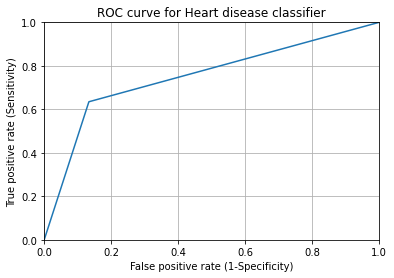

In [346]:
fpr, tpr, thresholds = roc_curve(y1_test, y2_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [349]:
pd.Series(dt.feature_importances_, index=x1_train.columns).sort_values(ascending=False)

education          0.277159
age                0.261402
sysBP              0.105658
cigsPerDay         0.100643
totChol            0.067766
currentSmoker      0.054803
glucose            0.044979
heartRate          0.029226
BMI                0.028144
BPMeds             0.019714
diaBP              0.006754
prevalentHyp       0.003752
gender             0.000000
prevalentStroke    0.000000
diabetes           0.000000
dtype: float64

In [353]:
pd.Series(model2.feature_importances_, index=x_train.columns).sort_values(ascending=False)

age                0.371484
education          0.261283
sysBP              0.094108
cigsPerDay         0.091825
currentSmoker      0.081557
glucose            0.028157
totChol            0.026912
heartRate          0.015728
BPMeds             0.014673
BMI                0.014274
gender             0.000000
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
diaBP              0.000000
dtype: float64

In [112]:
## Predicted Probabilities on test set
dt.predict_proba(x1_test)

array([[0.53046595, 0.46953405],
       [0.17307692, 0.82692308],
       [0.        , 1.        ],
       ...,
       [0.71144279, 0.28855721],
       [0.        , 1.        ],
       [0.04166667, 0.95833333]])

In [113]:
dt.classes_

array([0, 1], dtype=int64)

In [307]:
## Avg no.of correct predictions
dt.score(x1_test,y1_test)

0.7703252032520326

In [127]:
## AUC
roc_auc_score(y1_test, dt.predict_proba(x1_test)[:,1])

0.8222008232629648

In [128]:
y1_pred= dt.predict(x1_test)

In [129]:
cm3 = confusion_matrix(y1_test,y1_pred)
cm3

array([[442,  60],
       [205, 277]], dtype=int64)

In [131]:
accuracy_score(y1_test,y1_pred)

0.7306910569105691

In [136]:
pd.Series(dt.feature_importances_,index=x1_train.columns).sort_values(ascending=False)

education          0.306148
age                0.295086
cigsPerDay         0.103752
sysBP              0.085462
currentSmoker      0.062649
totChol            0.046176
heartRate          0.030255
glucose            0.028698
BPMeds             0.022536
BMI                0.017376
diaBP              0.001863
gender             0.000000
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
dtype: float64

In [357]:
# Use RFE (Recursive Feature Elimination) to find the best parameters.
from sklearn.feature_selection import RFE
rfe = RFE(DecisionTreeClassifier(max_depth=7),6)
rfe = rfe.fit(x1_train, y1_train)
feature_index= pd.Series(data= rfe.ranking_,index=x1_train.columns)
best_features = feature_index[feature_index==1].index
best_features

C:\Users\mallikarjunad\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=6 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Index(['age', 'education', 'cigsPerDay', 'totChol', 'sysBP', 'glucose'], dtype='object')